In [1]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
METRIC_TO_DROP = 'pr_rec_score' #pr_rec_score, matthews_corrcoef

ipf = pd.read_csv("IPF.csv",header=[0,1,2],index_col=0)
ipf_met = ipf.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
ipf_res = ipf_met.drop(columns=[c[0] for c in ipf_met.columns if 'ens' in c[0]],level=0)
ipf_res.shape

(32, 30)

In [61]:
clean = pd.read_csv("Clean.csv",header=[0,1,2],index_col=0)
clean_met = clean.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1)
clean_res = clean_met.drop(columns=[c[0] for c in clean_met.columns if 'ens' in c[0]],level=0)
clean_res.shape

(32, 30)

In [62]:
clean_res.max(axis=1)

activemq-5.8.0.csv                    0.338549
groovy-1_6_BETA_1.csv                 0.545409
activemq-5.3.0.csv                    0.397631
wicket-1.3.0-incubating-beta-1.csv    0.470077
jruby-1.1.csv                         0.618275
jruby-1.4.0.csv                       0.480280
lucene-2.3.0.csv                      0.758437
hbase-0.95.2.csv                      0.397737
lucene-3.0.0.csv                      0.423471
camel-2.9.0.csv                       0.335899
wicket-1.5.3.csv                      0.243518
lucene-3.1.csv                        0.257240
groovy-1_6_BETA_2.csv                 0.539218
activemq-5.2.0.csv                    0.528390
groovy-1_5_7.csv                      0.469808
hbase-0.95.0.csv                      0.500529
camel-2.11.0.csv                      0.313024
jruby-1.7.0.preview1.csv              0.387005
hive-0.10.0.csv                       0.522266
camel-2.10.0.csv                      0.307985
derby-10.2.1.6.csv                    0.601767
jruby-1.5.0.c

In [63]:
ipf_res.max(axis=1)

activemq-5.8.0.csv                    0.298645
groovy-1_6_BETA_1.csv                 0.387858
activemq-5.3.0.csv                    0.360596
wicket-1.3.0-incubating-beta-1.csv    0.316172
jruby-1.1.csv                         0.581226
jruby-1.4.0.csv                       0.454560
lucene-2.3.0.csv                      0.594446
hbase-0.95.2.csv                      0.316708
lucene-3.0.0.csv                      0.305950
camel-2.9.0.csv                       0.260012
wicket-1.5.3.csv                      0.218634
lucene-3.1.csv                        0.202845
groovy-1_6_BETA_2.csv                 0.349404
activemq-5.2.0.csv                    0.391744
groovy-1_5_7.csv                      0.426402
hbase-0.95.0.csv                      0.274197
camel-2.11.0.csv                      0.237792
jruby-1.7.0.preview1.csv              0.334062
hive-0.10.0.csv                       0.410384
camel-2.10.0.csv                      0.290995
derby-10.2.1.6.csv                    0.429984
jruby-1.5.0.c

In [44]:
ipf_res.max(axis=1,level=1)

clf,dt,lr,nb,svm,knn,rf
activemq-5.8.0.csv,0.474335,0.342082,0.474004,0.245838,0.444890,0.392952
groovy-1_6_BETA_1.csv,0.547560,0.448756,0.477124,0.404912,0.544095,0.501815
activemq-5.3.0.csv,0.494272,0.472916,0.481817,0.424655,0.524753,0.447561
wicket-1.3.0-incubating-beta-1.csv,0.489829,0.357969,0.490745,0.324476,0.460455,0.435468
jruby-1.1.csv,0.629748,0.673084,0.637127,0.626092,0.660959,0.683244
jruby-1.4.0.csv,0.582920,0.606199,0.602153,0.540115,0.601460,0.600050
lucene-2.3.0.csv,0.637724,0.722782,0.657482,0.726196,0.737696,0.710904
hbase-0.95.2.csv,0.639649,0.569297,0.537738,0.485588,0.614468,0.536781
lucene-3.0.0.csv,0.470032,0.358252,0.406017,0.339834,0.418161,0.336764
camel-2.9.0.csv,0.405706,0.246280,0.389101,0.191238,0.443050,0.346501


In [45]:
ipf_res.max(axis=1,level=0)

imb,smote,rus,wilson,tomek,None
activemq-5.8.0.csv,0.418996,0.474335,0.388056,0.436503,0.437730
groovy-1_6_BETA_1.csv,0.547560,0.527290,0.455096,0.438520,0.421622
activemq-5.3.0.csv,0.472916,0.481817,0.494744,0.510903,0.524753
wicket-1.3.0-incubating-beta-1.csv,0.474386,0.490745,0.475520,0.404711,0.394712
jruby-1.1.csv,0.623820,0.646747,0.661091,0.683244,0.679061
jruby-1.4.0.csv,0.596313,0.598777,0.600050,0.601460,0.606199
lucene-2.3.0.csv,0.698705,0.677875,0.737696,0.710904,0.656128
hbase-0.95.2.csv,0.527795,0.540024,0.617863,0.639649,0.626212
lucene-3.0.0.csv,0.451689,0.470032,0.399263,0.356249,0.346916
camel-2.9.0.csv,0.374828,0.389101,0.317495,0.369469,0.443050


In [46]:
ipf_res

imb                                    smote                                \
clf                                       dt        lr        nb       svm   
activemq-5.8.0.csv                  0.386121  0.292566  0.418996  0.205299   
groovy-1_6_BETA_1.csv               0.547560  0.418289  0.435016  0.394668   
activemq-5.3.0.csv                  0.468455  0.472916  0.468204  0.424655   
wicket-1.3.0-incubating-beta-1.csv  0.474386  0.350636  0.471040  0.247335   
jruby-1.1.csv                       0.599973  0.623820  0.596641  0.443278   
jruby-1.4.0.csv                     0.561707  0.571284  0.596313  0.499515   
lucene-2.3.0.csv                    0.627255  0.651512  0.642870  0.694248   
hbase-0.95.2.csv                    0.503769  0.471536  0.527795  0.476687   
lucene-3.0.0.csv                    0.451689  0.358252  0.341577  0.339834   
camel-2.9.0.csv                     0.352043  0.224071  0.374828  0.161027   
wicket-1.5.3.csv                    0.329830  0.173254  0.393171  0.134060   
lucene-3.1.csv                      0.328412  0.202577  0.287683  0.138081   
groovy-1_6_BETA_2.csv               0.452243  0.317998  0.396869  0.281229   
activemq-5.2.0.csv                  0.496568  0.490805  0.551619  0.471049   
groovy-1_5_7.csv                    0.407926  0.379873  0.457998  0.263110   
hbase-0.95.0.csv                    0.489135  0.471696  0.477076  0.432609   
camel-2.11.0.csv                    0.362450  0.155638  0.312688  0.125378   
jruby-1.7.0.preview1.csv            0.420637  0.340974  0.453619  0.246016   
hive-0.10.0.csv                     0.460471  0.404772  0.509681  0.386078   
camel-2.10.0.csv                    0.432540  0.169005  0.414766  0.110414   
derby-10.2.1.6.csv                  0.622881  0.638782  0.682517  0.667194   
jruby-1.5.0.csv                     0.542932  0.437722  0.537236  0.295424   
derby-10.3.1.4.csv                  0.608424  0.649682  0.643283  0.620233   
lucene-2.9.0.csv                    0.505785  0.476576  0.483645  0.444877   
hbase-0.94.0.csv                    0.570888  0.556664  0.564194  0.564743   
camel-1.4.0.csv                     0.527199  0.487422  0.514772  0.476072   
activemq-5.1.0.csv                  0.443016  0.353684  0.445628  0.249515   
activemq-5.0.0.csv                  0.569508  0.524946  0.589117  0.536440   
derby-10.5.1.1.csv                  0.454466  0.453034  0.513645  0.427699   
wicket-1.3.0-beta2.csv              0.442999  0.322849  0.454068  0.277685   
hive-0.12.0.csv                     0.239829  0.132771  0.258448  0.147827   
hive-0.9.0.csv                      0.560466  0.547707  0.603709  0.528019   

imb                                                          rus            \
clf                                      knn        rf        dt        lr   
activemq-5.8.0.csv                  0.346292  0.261402  0.474335  0.325404   
groovy-1_6_BETA_1.csv               0.544095  0.501815  0.527290  0.439766   
activemq-5.3.0.csv                  0.463668  0.435048  0.472513  0.425575   
wicket-1.3.0-incubating-beta-1.csv  0.460455  0.386281  0.489829  0.348827   
jruby-1.1.csv                       0.596847  0.605537  0.574258  0.646747   
jruby-1.4.0.csv                     0.573116  0.583019  0.570786  0.573419   
lucene-2.3.0.csv                    0.698705  0.697786  0.614449  0.637783   
hbase-0.95.2.csv                    0.487017  0.483965  0.540024  0.461347   
lucene-3.0.0.csv                    0.398041  0.292509  0.470032  0.334919   
camel-2.9.0.csv                     0.340972  0.223077  0.382694  0.218038   
wicket-1.5.3.csv                    0.320317  0.204617  0.449223  0.205533   
lucene-3.1.csv                      0.305513  0.200344  0.352424  0.203516   
groovy-1_6_BETA_2.csv               0.491233  0.420967  0.420131  0.323236   
activemq-5.2.0.csv                  0.460481  0.430706  0.467928  0.398408   
groovy-1_5_7.csv                    0.428205  0.377857  0.421174  0.433442   
hbase-0.95.0.csv     

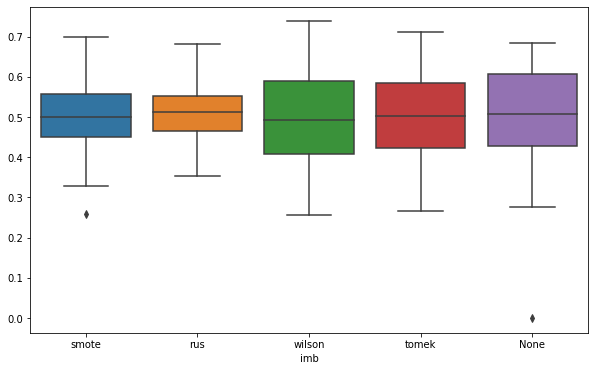

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ipf_res.max(axis=1,level=0));